<a href="https://colab.research.google.com/github/hwanhuh/LG_AI_Lab/blob/main/Object_Detection_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Object Detection with PyTorch**



---



In [1]:
# Making Directory

import os 
from os.path import join

path = os.getcwd() + "/MOT/"
!mkdir "{path}"




---


**1. Dataset**


*   https://motchallenge.net/ : MOT17Det Dataset for Pedestrian Detection Challenge


---






In [2]:
!wget -P "{path}" https://motchallenge.net/data/MOT17Det.zip

--2022-02-22 07:20:26--  https://motchallenge.net/data/MOT17Det.zip
Resolving motchallenge.net (motchallenge.net)... 131.159.19.34, 2a09:80c0:18::1034
Connecting to motchallenge.net (motchallenge.net)|131.159.19.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1952547113 (1.8G) [application/zip]
Saving to: ‘/content/MOT/MOT17Det.zip’

MOT17Det.zip        100%[===================>]   1.82G  16.7MB/s    in 1m 50s  

2022-02-22 07:22:16 (16.9 MB/s) - ‘/content/MOT/MOT17Det.zip’ saved [1952547113/1952547113]



In [3]:
!cd "{path}";unzip MOT17Det.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/MOT17-02/img1/000323.jpg  
  inflating: train/MOT17-02/img1/000324.jpg  
  inflating: train/MOT17-02/img1/000325.jpg  
  inflating: train/MOT17-02/img1/000326.jpg  
  inflating: train/MOT17-02/img1/000327.jpg  
  inflating: train/MOT17-02/img1/000328.jpg  
  inflating: train/MOT17-02/img1/000329.jpg  
  inflating: train/MOT17-02/img1/000330.jpg  
  inflating: train/MOT17-02/img1/000331.jpg  
  inflating: train/MOT17-02/img1/000332.jpg  
  inflating: train/MOT17-02/img1/000333.jpg  
  inflating: train/MOT17-02/img1/000334.jpg  
  inflating: train/MOT17-02/img1/000335.jpg  
  inflating: train/MOT17-02/img1/000336.jpg  
  inflating: train/MOT17-02/img1/000337.jpg  
  inflating: train/MOT17-02/img1/000338.jpg  
  inflating: train/MOT17-02/img1/000339.jpg  
  inflating: train/MOT17-02/img1/000340.jpg  
  inflating: train/MOT17-02/img1/000341.jpg  
  inflating: train/MOT17-02/img1/000342.jpg  
  inflating: train/MOT17-02/img1/000343.jpg 

In [4]:
import sys

motdata = join(path,'train/MOT17-09/img1/')
motdata2 = join(path,'train/MOT17-02/img1/')
motdata3 = join(path,'train/MOT17-04/img1/')
motdata4 = join(path,'train/MOT17-05/img1/')
motdata5 = join(path,'train/MOT17-10/img1/')
motdata6 = join(path,'train/MOT17-11/img1/')
motdata7 = join(path,'train/MOT17-13/img1/')

sys.path.append(motdata)
sys.path.append(motdata2)
sys.path.append(motdata3)
sys.path.append(motdata4)
sys.path.append(motdata5)
sys.path.append(motdata6)
sys.path.append(motdata7)

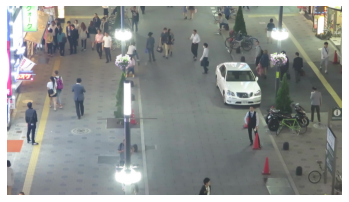

In [5]:
# Example: Original picture before detection

import matplotlib.pylab as plt
import cv2

# you can change motdata3 to others (motdata4,5....)
temp_data = motdata3
list_motdata = os.listdir(temp_data)  
list_motdata.sort()

img_ex_path = temp_data + list_motdata[0]
img_ex_origin = cv2.imread(img_ex_path)
img_ex = cv2.cvtColor(img_ex_origin, cv2.COLOR_BGR2RGB)

plt.imshow(img_ex)
plt.axis('off')
plt.show()




---


**2. Object Detection with Faster R-CNN**

*  We will use a pretrained Faster R-CNN model using ResNet50 as a backbone with FPN.





---




In [6]:
# Import required packages/modules first

from PIL import Image
import numpy as np
import torch
import torchvision
from torchvision import transforms as T

In [7]:
# Download the pretrained Faster R-CNN model from torchvision

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model = model.cuda()
model.eval()
torch.cuda.is_available()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

True

In [8]:
# Define the class names given by PyTorch's official Docs

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


In [9]:
# Defining a function for get a prediction result from the model

def get_prediction(img_path, threshold):
  img = Image.open(img_path) # Load the image
  transform = T.Compose([T.ToTensor()]) # Defing PyTorch Transform
  img = transform(img) # Apply the transform to the image
  img = img.cuda()
  pred = model([img]) # Pass the image to the model
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].cpu().numpy())] # Get the Prediction Score
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].cpu().detach().numpy())] # Bounding boxes
  pred_score = list(pred[0]['scores'].cpu().detach().numpy())
  pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1] # Get list of index with score greater than threshold.
  pred_boxes = pred_boxes[:pred_t+1]
  pred_class = pred_class[:pred_t+1]
  return pred_boxes, pred_class

In [10]:
# Defining a api function for object detection

def object_detection_api(img_path, threshold=0.5, rect_th=3, text_size=1.5, text_th=3):
 
  boxes, pred_cls = get_prediction(img_path, threshold) # Get predictions
  img = cv2.imread(img_path) # Read image with cv2
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB
  for i in range(len(boxes)):
    cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=rect_th) # Draw Rectangle with the coordinates
    cv2.putText(img,pred_cls[i], boxes[i][0],  cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th) # Write the prediction class
  plt.figure(figsize=(15,20)) # display the output image
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


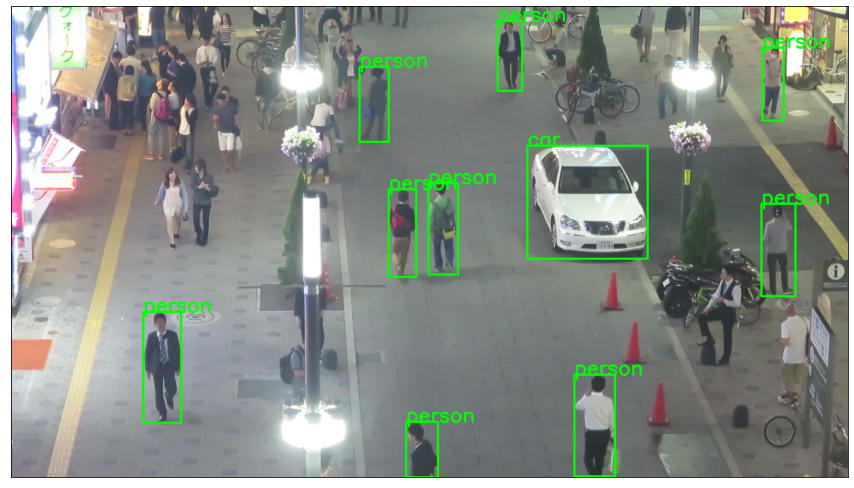

In [11]:
# Example: After detection
temp_data = motdata3
list_motdata = os.listdir(temp_data)

det_path = temp_data + list_motdata[1]
object_detection_api(det_path, threshold=0.99)

threshold 를 바꿔가면서 물체들이 어떻게 검출되는지 확인할 수 있습니다. 



---


**3. Object ID Tracking with SORT**


*   Simple Online and Realtime Tracking (SORT) algorithm for object ID tracking 

---



In [12]:
# Git clone: SORT Algorithm

!cd "{path}";git clone https://github.com/abewley/sort.git
  
sort = join(path,'sort/')
sys.path.append(sort)

Cloning into 'sort'...
remote: Enumerating objects: 202, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 202 (delta 0), reused 0 (delta 0), pack-reused 198
Receiving objects: 100% (202/202), 1.21 MiB | 8.75 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [13]:
# requirement for sort
!cd "{sort}";pip install -r requirements.txt

     |████████████████████████████████| 177 kB 5.2 MB/s 
     |████████████████████████████████| 12.5 MB 25.8 MB/s 
     |████████████████████████████████| 1.5 MB 36.3 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=22a2adb91d4a51e30e4be92c86ec3c1be631cb4a9a914e7879887843320c933b
  Stored in directory: /root/.cache/pip/wheels/ce/e0/ee/a2b3c5caab3418c1ccd8c4de573d4cbe13315d7e8b0a55fbc2
  Created wheel for lap: filename=lap-0.4.0-cp37-cp37m-linux_x86_64.whl size=1590215 sha256=5291077f5e9497e444a1fed94c55d3f728c54fde4a2bdc73bed60d854b2cfc7d
  Stored in directory: /root/.cache/pip/wheels/b1/0b/e3/ef9daf1b5547b56389e42c80c3100f1e6479bf5fd00fd9d6ba
Successfully built filterpy lap
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.3
    Uninstalling scikit-image-0.18.3:
      Successfully uninstalled scikit-image-0.18.3
ERROR: pip's dependency resolver does not currently take into account all the packages th

In [20]:
import json
import collections
from pprint import pprint
from sort import *

In [21]:
def get_pred(img_path):
  img = Image.open(img_path) # Load the image
  transform = T.Compose([T.ToTensor()]) # Defing PyTorch Transform
  img = transform(img) # Apply the transform to the image
  img = img.cuda()
  pred = model([img]) # Pass the image to the model
  return pred 

---


**4. Short Quiz**


*   The 'get_pred():' function takes image path as input and spit out the dictionary {'boxes;...', labels':...', scores':...} as output.

*   Sort mot tracker takes 5d array [box:(x1,y1,x2,y2), label] as input.

*   Using the output of the get_pred, write a code that only detects above the threshold in the form of [box: (x1,y1,x2,y2),label] to feed it over to the mot_tracker.

*   Hint: Currently, the output of get_pred is the tensor on GPU memory. You must transmit to the CPU memory, separate it from the computational graph, and replace it with a numpy array.

---

In [24]:
from tqdm import tqdm

def get_tracking(save_path, data_path, threshold):

  temp_data = data_path
  list_motdata = os.listdir(temp_data)  
  list_motdata.sort()

  mot_tracker = Sort()      # Tracker using SORT Algorithm

  for img_name in tqdm(list_motdata):
      arrlist = []
      img_path = temp_data + img_name
      det_img = cv2.imread(img_path)
      overlay = det_img.copy()
      det_result = get_pred(img_path)

      #####################################################################################
      bbox = det_result[0]['boxes'].cpu().detach().numpy()
      labels = det_result[0]['labels'].cpu().detach().numpy()
      scores = det_result[0]['scores'].cpu().detach().numpy()

      for (box, label, score) in zip(bbox, labels, scores):
        templist = box+[score]
        if label == 1 and score > threshold: # label 1 is a person in MS COCO Dataset
          arrlist.append(templist)
      #####################################################################################

      track_bbs_ids = mot_tracker.update(np.array(arrlist))
      mot_imgid = img_name.replace('.jpg','')
      newname = save_path + mot_imgid + '_mot.jpg'
      
      for j in range(track_bbs_ids.shape[0]):  
          ele = track_bbs_ids[j, :]
          x = int(ele[0])
          y = int(ele[1])
          x2 = int(ele[2])
          y2 = int(ele[3])
          track_label = str(int(ele[4])) 
          cv2.rectangle(det_img, (x, y), (x2, y2), (0, 255, 255), 4)
          cv2.putText(det_img, '#'+track_label, (x+5, y-10), 0,0.6,(0,255,255),thickness=2)
          
      cv2.imwrite(newname, det_img)

In [25]:
save_path = join(path, 'save/') # Making new directory for saving results
!mkdir "{save_path}"

get_tracking(save_path, motdata, 0.5)

mkdir: cannot create directory ‘/content/MOT/save/’: File exists


100%|██████████| 525/525 [04:33<00:00,  1.92it/s]


In [26]:
import re

path = save_path
paths = [os.path.join(path , i ) for i in os.listdir(path) if re.search(".jpg$", i )]
store1 = []
store2 = []
for i in paths :
    if len(i) == 19 :
        store2.append(i)
    else :
        store1.append(i)

paths = list(np.sort(store1)) + list(np.sort(store2))

In [27]:
pathOut = os.getcwd() + '/out.mp4'
fps = 30

import cv2
frame_array = []
for idx , path in enumerate(paths) : 
    if (idx % 2 == 0) | (idx % 5 == 0) :
        continue
    img = cv2.imread(path)
    height, width, layers = img.shape
    size = (width,height)
    frame_array.append(img)

out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
for i in range(len(frame_array)):
    out.write(frame_array[i])
out.release()

In [28]:
from google.colab import files
files.download('out.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
!rm -rf '/content/MOT/save/'

path = '/content/MOT/'
save_path = join(path, 'save/')
!mkdir "{save_path}"

In [ ]:
# get_tracking(save_path, motdata2, 0.5)